
# **Steganography**

Steganography is the practice of hiding information in other images, audio, text

You can add hidden messages to pictures, hide a file within another file, ... 

Here we'll try to hide some information inside an image.


In [1]:
from PIL import Image
import numpy as np

To hide a message in an image a function is needed that converts a string to a binary representation and one that embeds that data in the least significant bits of an image. To reveal the message we need to be able to reverse this, so first a function will extract the least significant bits and the final step is to convert them back into a string.

In [2]:
# Convert the hidden message to bytes

def encode_text(text, encoding='utf-8', errors='surrogatepass'):
    bits = bin(int.from_bytes(text.encode(encoding, errors), 'big'))[2:]
    return bits.zfill(8 * ((len(bits) + 7) // 8))

In [3]:
def decode_text(bits, encoding='utf-8', errors='surrogatepass'):
    n = int(bits, 2)
    return n.to_bytes((n.bit_length() + 7) // 8, 'big').decode(encoding, errors) or '\0'

To convert text to binary -

str.encode is used to turn the string into bytes
int.from_bytes now creates an integer number from those bytes. This works because in Python integer numbers can be arbitrarily large.
this number is converted into binary (e.g. 0b00101011010101010101010001... ) using bin()
an array slice is used to remove the first two characters (0b)
zfill is used to make sure the output is a multiple of 8
To revert from a binary the padding and slicing can be omitted and the other steps need to be reversed.

int() is used to convert a binary representation back to an integer number, note the parameter 2
using the int.to_bytes this number is converted back to a list of bytes
str.decode converts bytes back to text

In [27]:
hidden_message = "India is My Country"

encoded_text = encode_text(hidden_message)
decoded_text = decode_text(encoded_text)

print("encoded:", encoded_text)
print("decoded:", decoded_text)

encoded: 01001001011011100110010001101001011000010010000001101001011100110010000001001101011110010010000001000011011011110111010101101110011101000111001001111001
decoded: India is My Country


Here the PIL library is used to load the image, which is than turned into a one-dimensional list of all Red, Green and Blue values of the pixel in the image.

A suffix

The clause ix < len(encoded_text) else value ensures that if that pixels in spots where hidden information isn't stored remain identical.

Finally, the one-dimensional array is turned back into a 2D image with 3 color channels and exported as PIL image. To test this, and image pear.png is loaded, a Hello World message inserted and the image written to disk again. Make sure that when saving the image, a lossless file format is used. JPEG files are compressed in a way that some minor details are lost, this could remove the hidden content, so here PNG is used.

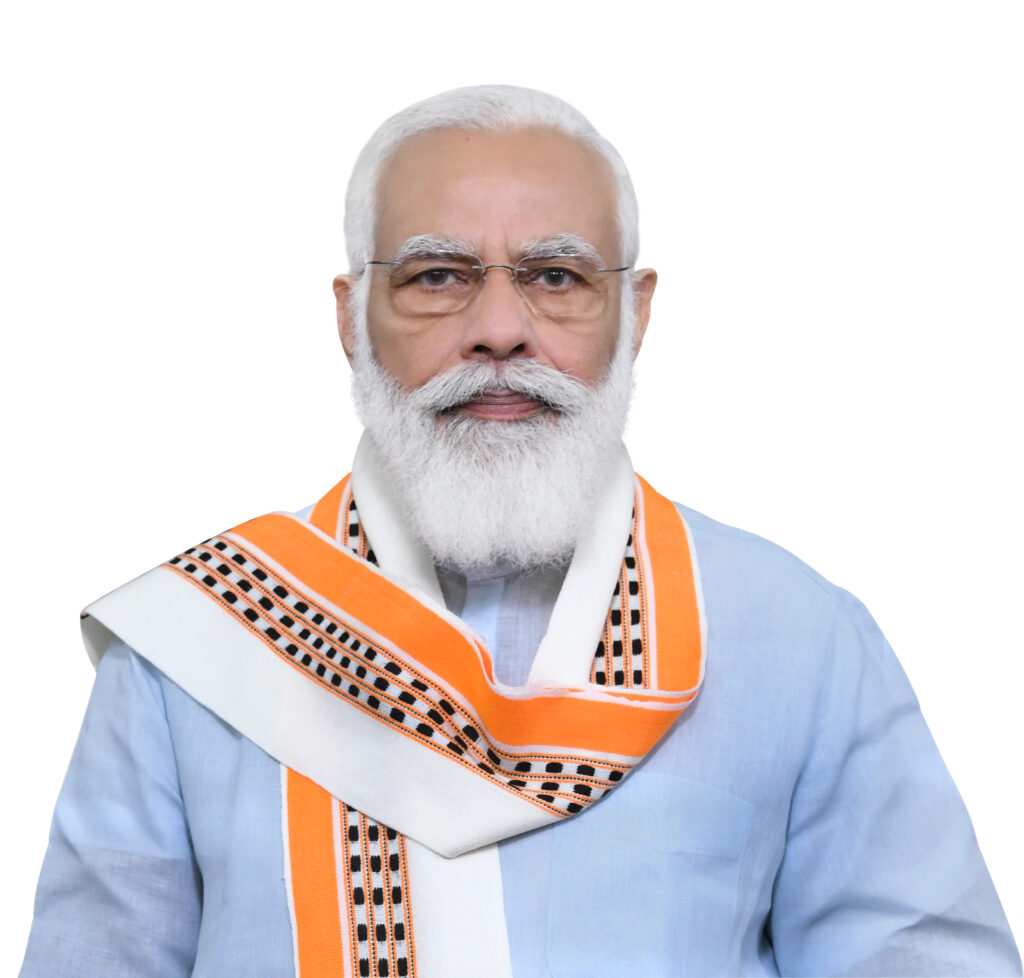

In [14]:
def encode_in_image(filename, text_message):
    # Open the image, store the shape and convert to one-dimensional list
    input_im = Image.open(filename, 'r').convert("RGB")
    image_shape = np.asarray(input_im).shape
    flat_array = np.asarray(input_im).flatten()

    # Encode the message and add prefix
    encoded_text = encode_text(text_message + "<STOP>")
    
    # Enter message in the least significant bit where necessary
    encoded_array = [
        (0b11111110 & value) | int(encode_bit) if ix < len(encoded_text) else value
        for ix, (encode_bit, value) in enumerate(zip(encoded_text.ljust(len(flat_array), '0'), flat_array))]

    # Turn encoded array into image and return
    encoded_im = np.array(encoded_array).reshape(image_shape)    
    return Image.fromarray(np.uint8(encoded_im)).convert('RGB')



encoded_im = encode_in_image('modi.jpg', "Attch on China")
encoded_im.save('hidden.png')
encoded_im

our image looks identical to the input image. By eye the minor differences are imperceivable. One last function to add, to extract the hidden message from an image. This is fairly simple, after te image is loaded it is flattened into a one-dimensional array again. For each value the least significant bit is extracted using a bit mask. These values are joined into a single string, which is decoded using the decode_text function. Finally, we need to break the decoded text on the suffix

Finally, we run that code on the image where a message was embedded ... and voila, our original message comes out again.

In [15]:
def extract_from_image(filename):
    # Open image
    encoded_im = np.asarray(Image.open(filename, 'r').convert("RGB"))

    # Extract least significant bits from flat (one-dimensional) image
    extracted_bits = [str(0b00000001 & value) for value in encoded_im.flatten()]

    # Join bits together, decode and split at <STOP>
    extracted_bits = ''.join(extracted_bits)
    return decode_text(extracted_bits, errors='replace').split('<STOP>')[0]
    
extract_from_image('hidden.png')

'Attch on China'



#Example 2

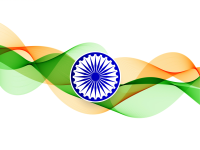

In [34]:
def encode_in_image(filename, text_message):
    # Open the image, store the shape and convert to one-dimensional list
    input_im = Image.open(filename, 'r').convert("RGB")
    image_shape = np.asarray(input_im).shape
    flat_array = np.asarray(input_im).flatten()

    # Encode the message and add prefix
    encoded_text = encode_text(text_message + "<STOP>")
    
    # Enter message in the least significant bit where necessary
    encoded_array = [
        (0b11111110 & value) | int(encode_bit) if ix < len(encoded_text) else value
        for ix, (encode_bit, value) in enumerate(zip(encoded_text.ljust(len(flat_array), '0'), flat_array))]

    # Turn encoded array into image and return
    encoded_im = np.array(encoded_array).reshape(image_shape)    
    return Image.fromarray(np.uint8(encoded_im)).convert('RGB')



encoded_im = encode_in_image('7112.png', "Hello India")
encoded_im.save('hidden.png')
encoded_im

In [35]:
def extract_from_image(filename):
    # Open image
    encoded_im = np.asarray(Image.open(filename, 'r').convert("RGB"))

    # Extract least significant bits from flat (one-dimensional) image
    extracted_bits = [str(0b00000001 & value) for value in encoded_im.flatten()]

    # Join bits together, decode and split at <STOP>
    extracted_bits = ''.join(extracted_bits)
    return decode_text(extracted_bits, errors='replace').split('<STOP>')[0]
    
extract_from_image('hidden.png')

'Hello India'

#example 3

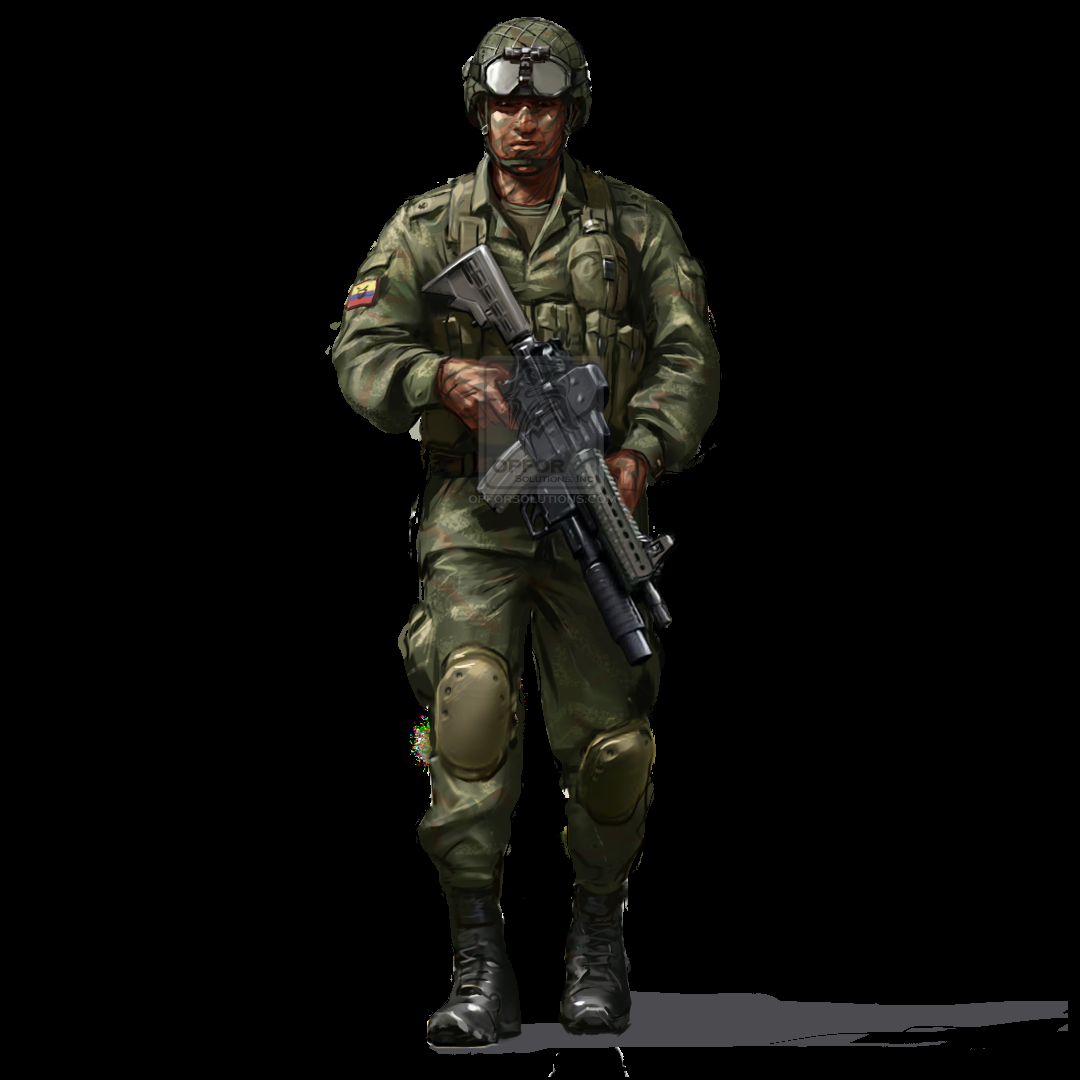

In [24]:
def encode_in_image(filename, text_message):
    # Open the image, store the shape and convert to one-dimensional list
    input_im = Image.open(filename, 'r').convert("RGB")
    image_shape = np.asarray(input_im).shape
    flat_array = np.asarray(input_im).flatten()

    # Encode the message and add prefix
    encoded_text = encode_text(text_message + "<STOP>")
    
    # Enter message in the least significant bit where necessary
    encoded_array = [
        (0b11111110 & value) | int(encode_bit) if ix < len(encoded_text) else value
        for ix, (encode_bit, value) in enumerate(zip(encoded_text.ljust(len(flat_array), '0'), flat_array))]

    # Turn encoded array into image and return
    encoded_im = np.array(encoded_array).reshape(image_shape)    
    return Image.fromarray(np.uint8(encoded_im)).convert('RGB')



encoded_im = encode_in_image('ar.png', "Indian army always for your Security")
encoded_im.save('hidden.png')
encoded_im

In [25]:
def extract_from_image(filename):
    # Open image
    encoded_im = np.asarray(Image.open(filename, 'r').convert("RGB"))

    # Extract least significant bits from flat (one-dimensional) image
    extracted_bits = [str(0b00000001 & value) for value in encoded_im.flatten()]

    # Join bits together, decode and split at <STOP>
    extracted_bits = ''.join(extracted_bits)
    return decode_text(extracted_bits, errors='replace').split('<STOP>')[0]
    
extract_from_image('hidden.png')

'Indian army always for your Security'

In [ ]:
# End